# Spike Train Analysis

In this exercise, we will be continuing with the ferret V1 dataset that was introduced during Monday's notebook. Here, you will express each condition as both a spike count rate as well as a spike density rate and compare and contrast the results. You will also practice computing Fano factor and coefficient of variation (CV) for this neuron.

Start off by running the cell below to load in the data.

In [1]:
from scipy.io import loadmat

V1_data = loadmat('V1Orientation.mat')
spikes = V1_data['spikes']
print(spikes.shape)

(18, 3500, 30)


Within the data file there is a 3-dimenisional matrix saved as the variable *spikes*. The first dimension describes the stimulus condition: the first 16 items represent stimulus orientation between 0-337.5 degrees in 22.5 degree increments, starting at 0. The last two are blank control conditions where a uniform gray background was presented.

The second dimension represents the neuron's response (sampled at 1000𝐻𝑧). This dimension is a binary vector in which 1 represents a spike being fired. In this experiment, a grating (stripes of a particular orientation) was turned on at 𝑡=0, the grating began moving at 500 𝑚𝑠, and the stimulus was turned off at 2500 𝑚𝑠.

The third dimension represents trial repetitions. There are 30 trials in each condition.

Fill in the code below to compute the spike count rate for each of the 30 trials in each of the 16 experimental conditions.

In [9]:
import numpy as np

# create a placeholder of zeros that is 16 rows (conditions) by 30 columns (trials)
allRates = np.zeros((16,30))

# create an outer loop that goes through each experimental condition
for i in range(16): # fill parentheses in accordingly
    conditionData = spikes[i, :, :] # fill this in to isolate the ith condition. Hint: conditionData should be 3500x30
    
    # create an inner loop that goes through trials
    for j in range(spikes.shape[2]): # fill parentheses in accordingly
        # isolate time points from 500ms to 2500 ms in the jth trial
        trialData = conditionData[499:2499, j] # fill in brackets accordingly. trialData should be shape 2000,
        
        spikeCountRate = sum(trialData)/2
        
        # store the spike count rate in the allRates array
        allRates[i,j] = spikeCountRate # fill in the brackets accordingly

Run the following code snippet to visualize your firing rates for each of your conditions over the course of the experiment. **Discuss** what you see in all conditions as the experiment goes on.

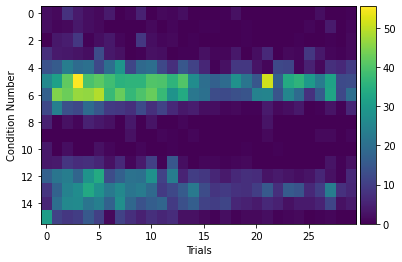

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

ax = plt.subplot(111)
im = plt.imshow(allRates, aspect='auto')
plt.xlabel('Trials')
plt.ylabel('Condition Number')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

Plot the mean spike count rate as a function of condition:

* Create a vector called orientations that represents orientations 0 to 337.5 (inclusive) in steps of 22.5
* Compute mean spike count rate over trials

Text(0, 0.5, 'Spike Count Rate (Hz)')

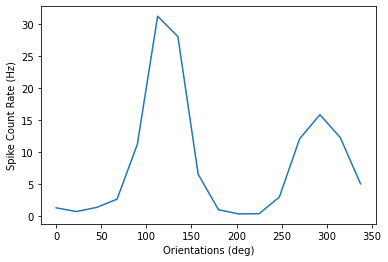

In [11]:
orientations = np.arange(0, 360, 22.5)
spikeCountRate = np.mean(allRates, axis=1)

plt.figure()
plt.plot(orientations, spikeCountRate)
plt.xlabel("Orientations (deg)")
plt.ylabel("Spike Count Rate (Hz)")

Compute the Fano factor and the coefficient of variation for this neuron. Remember that the Fano factor is the variance in rate over the mean rate, and the CV is the standard deviation of rate over the mean rate.

In [18]:
fano = np.var(allRates) / np.mean(allRates)
print(fano)

15.495501519994985


Let's now compute the spike density rate for your neuron. Fill in the code template below.

In [19]:
# create a placeholder of zeros that is 16 rows (conditions) by 2000 columns (time points)
allRates2 = np.zeros((16, 2000))

# create an outer loop that goes through each experimental condition
for i in range(16): # fill parentheses in accordingly
    # parse out the ith condition (Hint: should be 3500x30)
    conditionData = spikes[i, :, :] # fill in brackets accordingly
    
    # create an inner loop that goes from 500 to 2500 ms
    for j in range(499, 2499): # fill in parentheses accordingly
        # isolate the data at time j
        timeData = conditionData[j,:] # fill in brackets accordingly
        
        # compute the spike density rate
        spikeDensity = (1/(1/1000)) * sum(timeData)/30
        
        # save the spike density to the allRates array
        allRates2[i, j-499] = spikeDensity # fill in brackets accordingly

Run the following code snippet to visualize your result. **Discuss** with your group which method (spike count rate or spike density rate) gives a better picture of what the neuron is doing.

In [20]:
print(allRates2.shape)

(16, 2000)


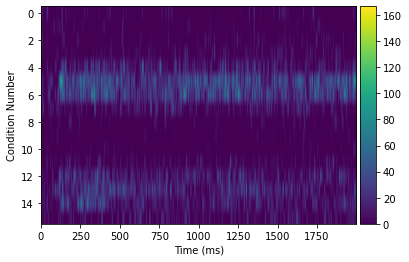

In [21]:
ax = plt.subplot(111)
im = plt.imshow(allRates2, aspect='auto')
plt.xlabel('Time (ms)')
plt.ylabel('Condition Number')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

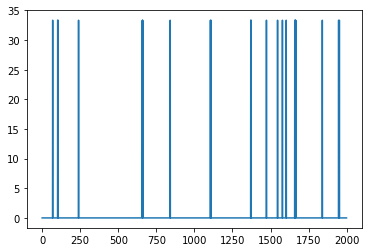

In [25]:
#print(allRates2.shape)
plt.figure()
plt.plot(np.arange(2000), allRates2[9,:])

Great work today! Please submit this to Lyceum for grading.